# <a href="https://www.linkedin.com/in/imanojchandra/">Manoj Chandra</a>

# Data Science & Business Analytics Intern at <a href="https://www.thesparksfoundationsingapore.org/">The Sparks Foundation.</a>

## Task 1: Prediction using Supervised Machine Learning

### Simple Linear Regression
This is a simple linear regression task as it involves just two variables. 
<br>In this regression task we will **predict the percentage of marks that a student is expected to score based upon the number of hours they studied.**

### Importing required libraries

In [92]:
# Importing the standard required libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [93]:
# Reading data from the provided url
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
scores_data = pd.read_csv(url)

# Displaying the Data
scores_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## EDA

In [11]:
scores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [7]:
scores_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [33]:
#Checking data for missing values using
scores_data.isnull().sum() #total no. of missing value

Hours     0
Scores    0
dtype: int64

### Visualizing the data

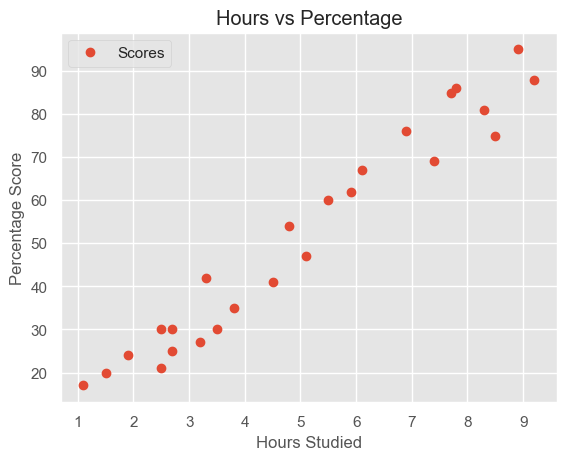

In [63]:
# Plotting the distribution of scores
scores_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid(True)
plt.show()

The scatter plot above indicates a direct correlation between the amount of time spent studying and the resulting percentage score. As study hours increase, there is a noticeable upward trend in the percentage of scores achieved. This observation aligns with the common understanding that increased study time typically leads to higher academic performance.

### Preparing the Data for Further Splitting and Training

Now, We extract the features (hours) and target (scores) from the dataset.

In [27]:
# Preparing the data
X = s_data.iloc[:, :-1].values  # Features (Hours)
y = s_data.iloc[:, 1].values    # Target (Scores)

### Splitting the Data

In [34]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Training the Model

In [49]:
# Training the model
regression_train = LinearRegression()  
regression_train.fit(X_train, y_train) 
print("Training complete using " + str(regression_train))

Training complete using LinearRegression()


### Plotting the regression line

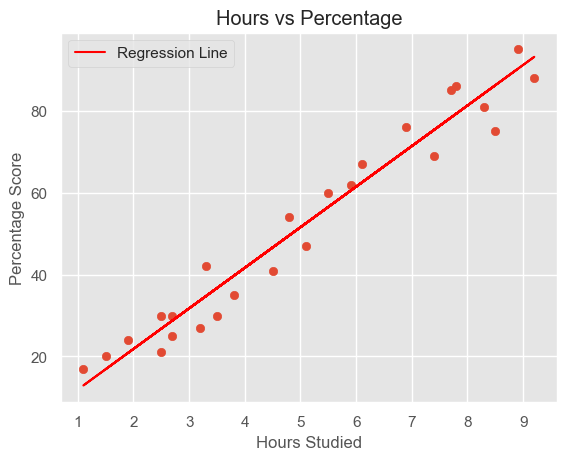

In [94]:
# Plotting the regression line
line = regression_train.coef_*X + regression_train.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='red', label='Regression Line')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.grid(True)
plt.show()

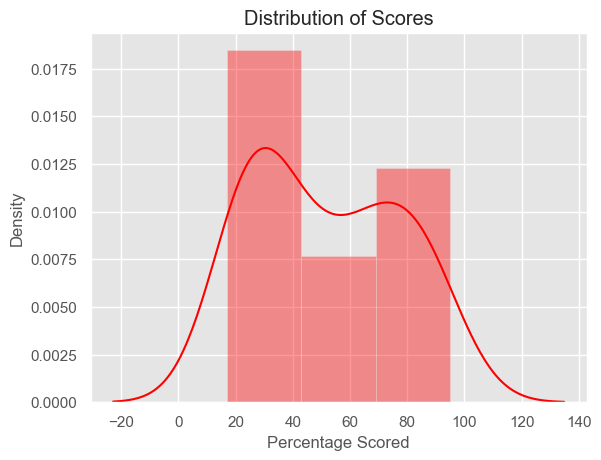

In [58]:
# Plotting the distribution using Seaborn
sns.distplot(scores_data['Scores'], kde=True, color='red')
plt.title('Distribution of Scores')
plt.xlabel('Percentage Scored')
plt.ylabel('Density')
plt.grid(True)
plt.show()

## Making Predictions

We predict the scores for the test data and compare them with the actual scores.

In [78]:
# Making predictions
print(X_test)  # Testing data - In Hours
y_pred = regression_train.predict(X_test)  # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [66]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


 ### Plotting the actual vs predicted values

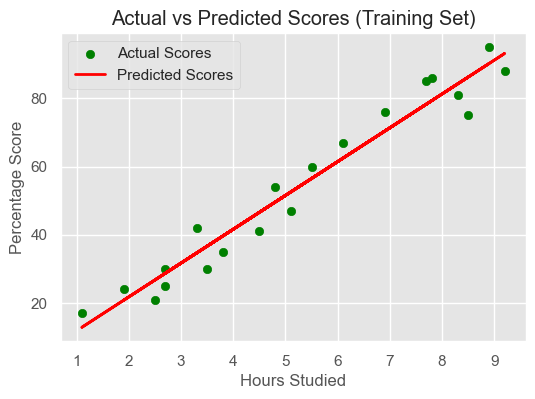

In [79]:
# Plotting the actual vs predicted values for the training set
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='green', label='Actual Scores')
plt.plot(X_train, regression_train.predict(X_train), color='red', linewidth=2, label='Predicted Scores')
plt.title('Actual vs Predicted Scores (Training Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.grid(True)
plt.show()


I think It would be even more convenient if we could visualize the **comparison results as a bar graph.**

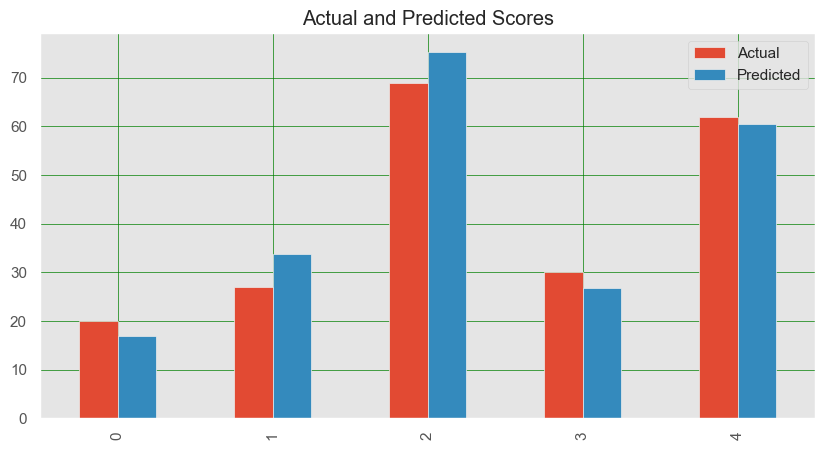

In [100]:
#We can also visualize comparison result as a bar graph 
df.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual and Predicted Scores')
plt.show()

### Plotting the test set results

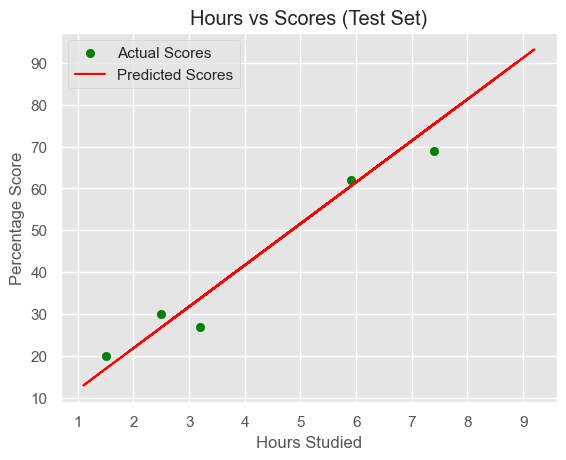

In [80]:
# plotting the test set results
plt.scatter(X_test, y_test, color='green', label='Actual Scores')  # Scatter plot for actual scores on the test set
plt.plot(X_train, regression_train.predict(X_train), color='red', label='Predicted Scores')  # Regression line for predicted scores on the training set
plt.title('Hours vs Scores (Test Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.grid(True)
plt.show()

## Evaluating Model Performance

In [89]:
# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Number of observations and predictors
n = len(y_test)
p = X_test.shape[1]

# Calculating adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Printing the evaluation metrics
print(f"R-squared: {r2:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 0.95
Adjusted R-squared: 0.93
Mean Absolute Error: 4.18
Mean Squared Error: 21.60
Root Mean Squared Error: 4.65


## Predicting Specific Value

Let's finally predict the score for a student who studies 9.25 hours per day.

In [77]:
# Predicting the score for 9.25 study hours
hours = 9.25
own_pred = re.predict(np.array([[hours]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737538


# Task Completed